In [1]:
# Mountage of Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Installation of TensorFlow
# Below code is marked as comment. This is required if tensor flow is not installed


#!pip install tensorflow==2.3.0 

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
# Reading DataSet

import pandas as pd
import numpy as np
import seaborn as sns
% matplotlib inline

bank_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank.csv')
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Checking shape of Data
bank_data.shape

(10000, 14)

In [6]:
# Checking datatypes of Data
bank_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# Checking for nulll value in  DataSet
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Checking for no of unique in dataset
bank_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

There are unique Row Number and unique Customer ID. Hence there are no duplicated customer data, However surname may match to many but can be saggregated by customer ID.


In [9]:
# Dropping columns which are not required in Analysis
bank_data.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1, inplace=True)

In [10]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
bank_data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

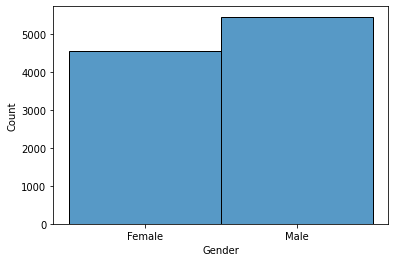

In [12]:
sns.histplot(bank_data['Gender'])

# We can observe that based on Gender, difference in no of Male and Female Customer are not much

In [13]:
bank_data.groupby(by='Gender')['Exited'].value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

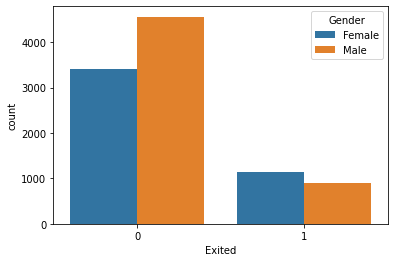

In [14]:
 sns.countplot(x="Exited", hue="Gender", data=bank_data)

In [15]:
Non_Exited=bank_data['Exited'].value_counts()[0]
Exited=bank_data['Exited'].value_counts()[1]

Non_Exited_perc= (Non_Exited/(Non_Exited + Exited))*100
Exited_perc= (Exited/(Non_Exited + Exited))*100

print('Exited Customer     % :' ,Exited_perc)
print('Non Exited Customer % :' ,Non_Exited_perc)


Exited Customer     % : 20.369999999999997
Non Exited Customer % : 79.63


- There are 21% customer out of this complete data set has Exited.

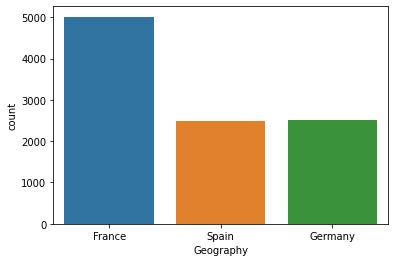

In [16]:
sns.countplot(x="Geography", data=bank_data)

More Number of customers are there in France in compared to Spain and Germany.

In [17]:
bank_data.groupby(by='Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

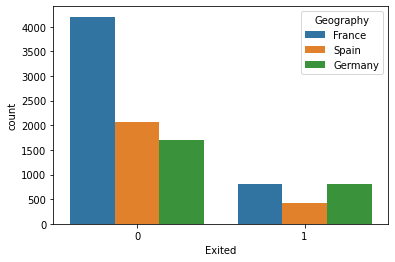

In [18]:
 sns.countplot(x="Exited", hue="Geography", data=bank_data)

Looking to the ratio of total no of Customer and total no of customer exiting, we can say that more number of customer has exited from Germany

More number of Female Customers have exited Bank in comparison to male customers.

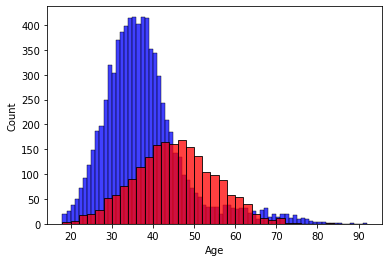

In [19]:
import matplotlib.pyplot as plt
sns.histplot(bank_data['Age'][bank_data['Exited']==0],color='blue',label='non-exited')
sns.histplot(bank_data['Age'][bank_data['Exited']==1],color='red',label='exited')
plt.show()

- Non Exited Customer graph(Blue Color) is right skewed. There are some customer who are at agemore than 70 and are still customer
- Exited customer graph is like uniform distribution

In [20]:
# Statistics of Data

bank_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [21]:
# Distinguish the features and target variable

X= bank_data.drop(columns= 'Exited', axis=1)    # Feature Variable
y= bank_data['Exited']                          # Target Variable

In [22]:
# Converting categorical variable using one Hot Encoding
X= pd.get_dummies(X)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [23]:
# Dividing data into Training Set and Testing Set
#  importing library train test split
from sklearn.model_selection import train_test_split

test_size = 0.20 # taking 80:20 training and testing set
seed = 5  # Random numbmer selection for seeding for reapeatability of code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [24]:
# Checking Shape of training / testing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [25]:
# Normalization of data
# Now scale the data as features are on different scales. All data must be scaled before modelling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()    # MinMaxScalar for scaling

# fitting the Scaler transform on training and testing seperately
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.8       , 0.28378378, 0.6       , ..., 1.        , 1.        ,
        0.        ],
       [0.752     , 0.21621622, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.476     , 0.62162162, 0.3       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.466     , 0.17567568, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.658     , 0.24324324, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.278     , 0.45945946, 0.1       , ..., 0.        , 1.        ,
        0.        ]])

In [26]:
# Convert the data elements into tensors as we need tensors to be fed into different tensorflow based operations

X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train.values)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test.values)

In [27]:
X_train.shape, X_test.shape

(TensorShape([8000, 13]), TensorShape([2000, 13]))

Initialize & build the model (2 layers in Hidden layer, activation = Relu)

In [28]:
# Initialize Sequential model
model = tf.keras.models.Sequential()


# Add Input layer to the model
model.add(tf.keras.Input(shape=(13,))) # 13 Features


# Hidden layers
model.add(tf.keras.layers.Dense(13, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(10, activation='relu', name='Layer_2'))

#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='Output'))

In [29]:
# model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 13)                182       
_________________________________________________________________
Layer_2 (Dense)              (None, 10)                140       
_________________________________________________________________
Output (Dense)               (None, 1)                 11        
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,  batch_size = 30)

Epoch 1/50
267/267 [==============================] - 1s 3ms/step - loss: 0.5616 - accuracy: 0.7251 - val_loss: 0.4873 - val_accuracy: 0.7975
Epoch 2/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4811 - accuracy: 0.7960 - val_loss: 0.4712 - val_accuracy: 0.7975
Epoch 3/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4660 - accuracy: 0.7971 - val_loss: 0.4589 - val_accuracy: 0.8025
Epoch 4/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4516 - accuracy: 0.8048 - val_loss: 0.4468 - val_accuracy: 0.8085
Epoch 5/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.8120 - val_loss: 0.4372 - val_accuracy: 0.8125
Epoch 6/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4245 - accuracy: 0.8185 - val_loss: 0.4240 - val_accuracy: 0.8160
Epoch 7/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8211 - val_loss: 0.4112 - val_accuracy: 0.8195
Epoch 

In [32]:
results = model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8530


In [33]:
# Predict the model
predict_arr=model.predict(X_test)
predict_arr[:10]

array([[0.03385691],
       [0.0595954 ],
       [0.068305  ],
       [0.06269954],
       [0.05250505],
       [0.09442736],
       [0.0081165 ],
       [0.3174991 ],
       [0.00999431],
       [0.9545979 ]], dtype=float32)

In [34]:
# Predict the results using 0.5 as a threshold

predict_arr_thrshld= predict_arr> 0.5
predict_arr_thrshld

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [35]:
# Confusion matrix with optimal Threshold on test set
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score,f1_score, precision_score
metrics.confusion_matrix(y_test, predict_arr_thrshld)

array([[1545,   50],
       [ 244,  161]])

In [36]:
# Printing Metrics

print('Neural Network Metrics')
print('Accuracy  :' ,accuracy_score(y_test, predict_arr_thrshld))
print('Precision :',precision_score(y_test, predict_arr_thrshld))
print('Recall    :',recall_score(y_test, predict_arr_thrshld))
print('F1 Score  :',f1_score(y_test, predict_arr_thrshld))

Neural Network Metrics
Accuracy  : 0.853
Precision : 0.7630331753554502
Recall    : 0.39753086419753086
F1 Score  : 0.5227272727272727


In [37]:
# Rebuilding Model by changing Hyper parameters as improvement points
# using tanh as activation function
# using 3 layers in hidden layer
# using different optimizer 

Initialize & build the model   (3 layers in Hidden layer, activation = tanh)

In [38]:
# Initialize Sequential model
model = tf.keras.models.Sequential()


# Add Input layer to the model
model.add(tf.keras.Input(shape=(13,))) # 13 Features


# Hidden layers
model.add(tf.keras.layers.Dense(20, activation='tanh', name='Layer_1'))
model.add(tf.keras.layers.Dense(10, activation='tanh', name='Layer_2'))
model.add(tf.keras.layers.Dense(5, activation='tanh', name='Layer_3'))

#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='Output'))

In [39]:
# model compilation
from tensorflow.keras import optimizers
sgd = optimizers.Adam(lr = 0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 20)                280       
_________________________________________________________________
Layer_2 (Dense)              (None, 10)                210       
_________________________________________________________________
Layer_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
Output (Dense)               (None, 1)                 6         
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size = 32)

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4630 - accuracy: 0.8026 - val_loss: 0.4333 - val_accuracy: 0.8180
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4183 - accuracy: 0.8282 - val_loss: 0.4288 - val_accuracy: 0.8115
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3998 - accuracy: 0.8309 - val_loss: 0.3892 - val_accuracy: 0.8445
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8491 - val_loss: 0.3906 - val_accuracy: 0.8455
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3617 - accuracy: 0.8506 - val_loss: 0.3805 - val_accuracy: 0.8450
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3572 - accuracy: 0.8526 - val_loss: 0.3781 - val_accuracy: 0.8425
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3570 - accuracy: 0.8541 - val_loss: 0.3673 - val_accuracy: 0.8490
Epoch 

In [42]:
results = model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8500


In [43]:
predict_arr=model.predict(X_test)
predict_arr[:10]

array([[0.02159878],
       [0.04477165],
       [0.06621866],
       [0.03595257],
       [0.08408789],
       [0.08955164],
       [0.01786377],
       [0.37640822],
       [0.02090557],
       [0.98125046]], dtype=float32)

In [44]:
predict_arr_thrshld= predict_arr> 0.5
predict_arr_thrshld

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [45]:
# Confusion matrix with optimal Threshold on test set
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score,f1_score, precision_score
metrics.confusion_matrix(y_test, predict_arr_thrshld)

array([[1545,   50],
       [ 250,  155]])

In [46]:
# printing matrix

print('Neural Network Metrics')
print('Accuracy  :' ,accuracy_score(y_test, predict_arr_thrshld))
print('Precision :',precision_score(y_test, predict_arr_thrshld))
print('Recall    :',recall_score(y_test, predict_arr_thrshld))
print('F1 Score  :',f1_score(y_test, predict_arr_thrshld))

Neural Network Metrics
Accuracy  : 0.85
Precision : 0.7560975609756098
Recall    : 0.38271604938271603
F1 Score  : 0.5081967213114754
